# Downloading Data

We’ll access and visualize data stored in two common data formats, CSV and JSON. We’ll use Python’s csv module to process weather data stored in the CSV (comma-separated values) format and analyze high and low temperatures over time in two different locations.

## Parsing cvs file headers

Let’s start by examining the first line of the file, which contains a series of headers for 
the data:

In [1]:
import csv

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)


['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


## Printing the Headers and Their Positions

To make it easier to understand the file header data, print each header and 
its position in the list

In [2]:
import csv

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    for index, column_header in enumerate(header_row):
        print(index, column_header)


0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


## Extracting and Reading Data

Now that we know which columns of data we need, let’s read in some of that data. First, we’ll read in the high temperature for each day:

In [3]:
import csv

# Get high temperatures from file.
filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = [] 
    for row in reader:
        highs.append(row[1])
    
    print(highs)


['64', '71', '64', '59', '69', '62', '61', '55', '57', '61', '57', '59', '57', '61', '64', '61', '59', '63', '60', '57', '69', '63', '62', '59', '57', '57', '61', '59', '61', '61', '66']


We’ve extracted the high temperature for each date and stored them neatly in a list as strings. 
Next, convert these strings to numbers with int() so they can be read by matplotlib:

In [4]:
import csv

# Get high temperatures from file.
filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = []
    for row in reader:
        try:
            high = int(row[1])  # Convert string to integer
            highs.append(high)
        except ValueError:
            print(f"Missing or invalid data in row: {row}")
    
    print(highs)


[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


## Plotting Data in a Temperature Chart

To visualize the temperature data we have, we’ll first create a simple plot of the daily highs using matplotlib, as shown here:

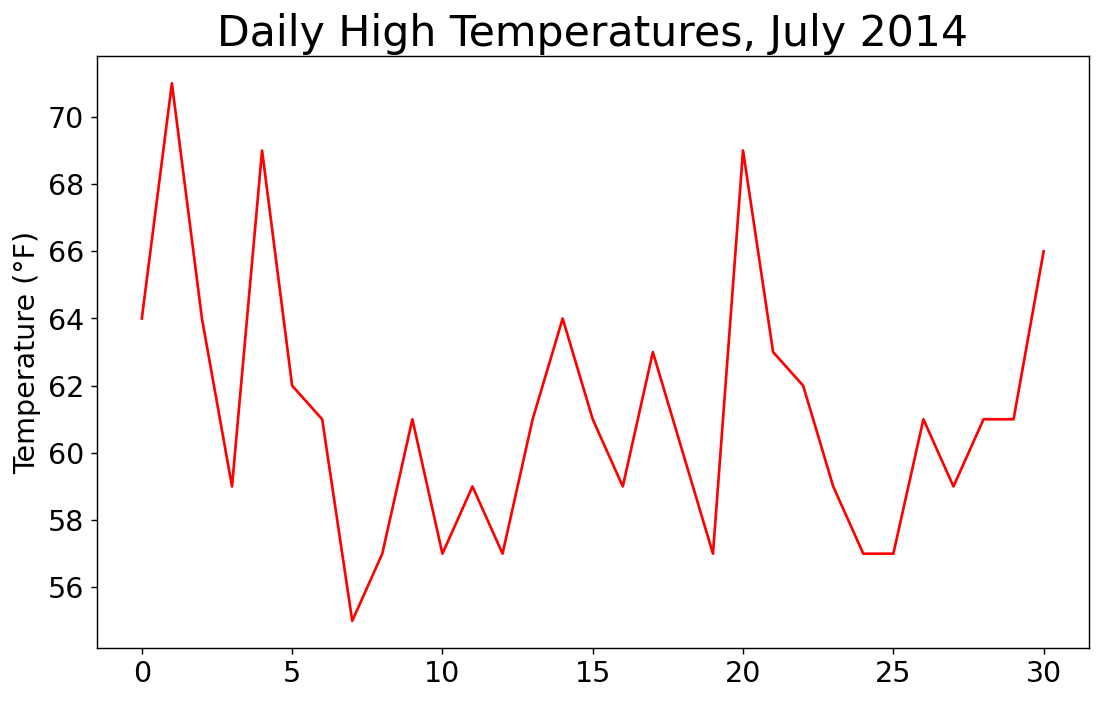

In [6]:
import csv
from matplotlib import pyplot as plt

# Get high temperatures from file.
filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = []
    for row in reader:
        try:
            high = int(row[1])  # Convert string to integer
            highs.append(high)
        except ValueError:
            print(f"Missing or invalid data in row: {row}")

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(highs, c='red')

# Format plot.
plt.title("Daily High Temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)
plt.ylabel("Temperature (°F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

# Show plot.
plt.show()


_A line graph showing daily high temperatures for July 2014 in Sitka, Alaska_

## The datetime Module

Import the datetime module

In [7]:
from datetime import datetime


Use strptime() for Conversion

In [8]:
date_string = '2014-7-1'  # Date in string format
first_date = datetime.strptime(date_string, '%Y-%m-%d')


Inspect the Result

In [9]:
print(first_date)
# Output: 2014-07-01 00:00:00



2014-07-01 00:00:00


Use the datetime Object

In [10]:
print(first_date.year)  # Output: 2014
print(first_date.month)  # Output: 7
print(first_date.day)  # Output: 1


2014
7
1


Integrate into Your Program

In [11]:
from datetime import datetime
import csv

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates = []
    highs = []

    for row in reader:
        try:
            # Convert date string to datetime object
            current_date = datetime.strptime(row[0], '%Y-%m-%d')
            dates.append(current_date)
            
            # Convert high temperature to integer
            high = int(row[1])
            highs.append(high)
        except ValueError:
            print(f"Missing or invalid data for row: {row}")


## Plotting Dates

Let's extract dates for the daily highs and passing the dates and the highs to plot(), as shown here:

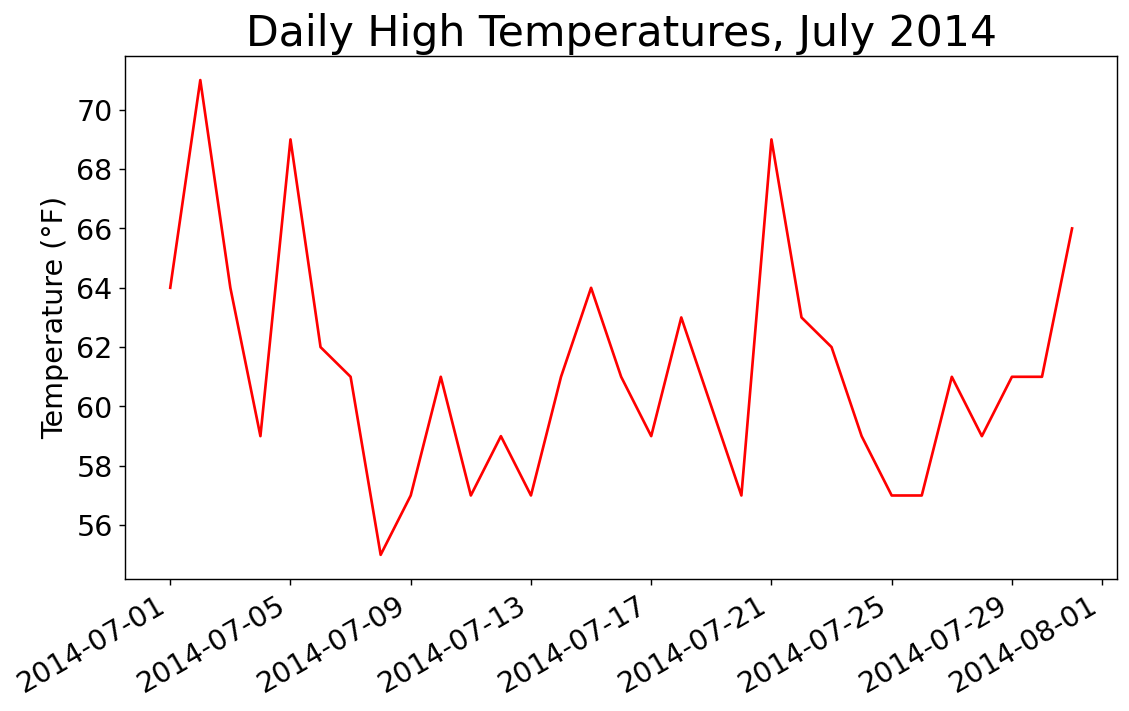

In [12]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Get dates and high temperatures from file.
filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")  # Convert date string to datetime
            dates.append(current_date)
            
            high = int(row[1])  # Convert high temperature to integer
            highs.append(high)
        except ValueError:
            print(f"Missing or invalid data for row: {row}")

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# Format plot.
plt.title("Daily High Temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()  # Auto-format dates on x-axis
plt.ylabel("Temperature (°F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

# Show plot.
plt.show()


_The graph is more meaningful now that it has dates on the x-axis_

## Plotting a longer timeframe

Using sitka_weather_2014.csv, which contains a full year’s worth of Weather to plot data for Sitka Weather.

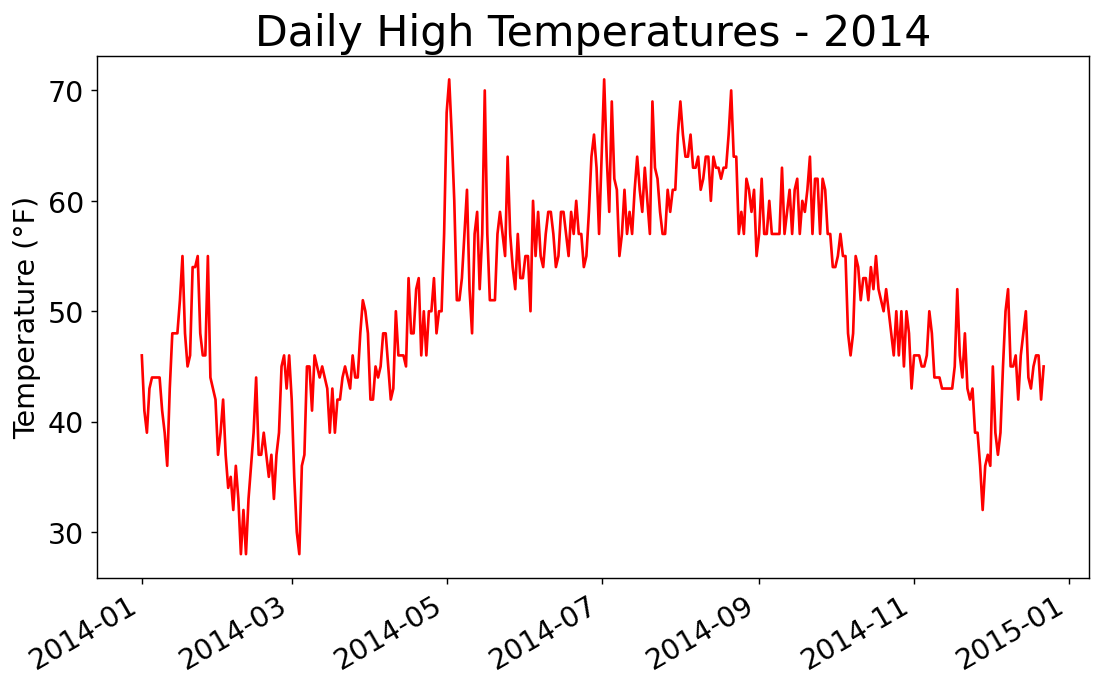

In [13]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Get dates and high temperatures from file.
filename = 'sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")  # Convert date string to datetime
            dates.append(current_date)
            
            high = int(row[1])  # Convert high temperature to integer
            highs.append(high)
        except ValueError:
            print(f"Missing or invalid data for row: {row}")

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# Format plot.
plt.title("Daily High Temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()  # Auto-format dates for readability
plt.ylabel("Temperature (°F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

# Show plot.
plt.show()


_A year’s worth of data_

## Plotting a Second Data Series

We need to extract the low temperatures from the data file and then add them to our graph, as shown here:

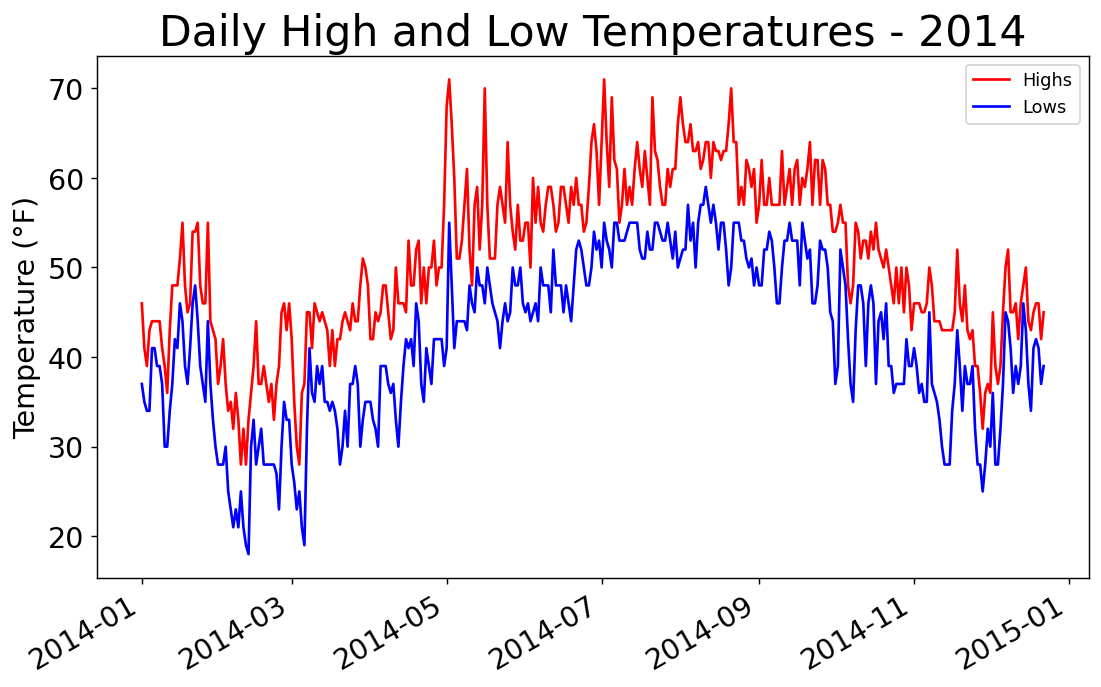

In [15]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Get dates, high, and low temperatures from file.
filename = 'sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")  # Convert date string to datetime
            dates.append(current_date)
            
            high = int(row[1])  # Convert high temperature to integer
            highs.append(high)
            
            low = int(row[3])  # Convert low temperature to integer
            lows.append(low)
        except ValueError:
            print(f"Missing or invalid data for row: {row}")

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', label='Highs')
plt.plot(dates, lows, c='blue', label='Lows')

# Format plot.
plt.title("Daily High and Low Temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()  # Auto-format dates for readability
plt.ylabel("Temperature (°F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()  # Add a legend to distinguish highs and lows

# Show plot.
plt.show()


_Two data series on the same plot_

## Shading an Area in the Chart

Let’s add a finishing touch to the graph by using shading to show the range between each day’s high and low temperatures

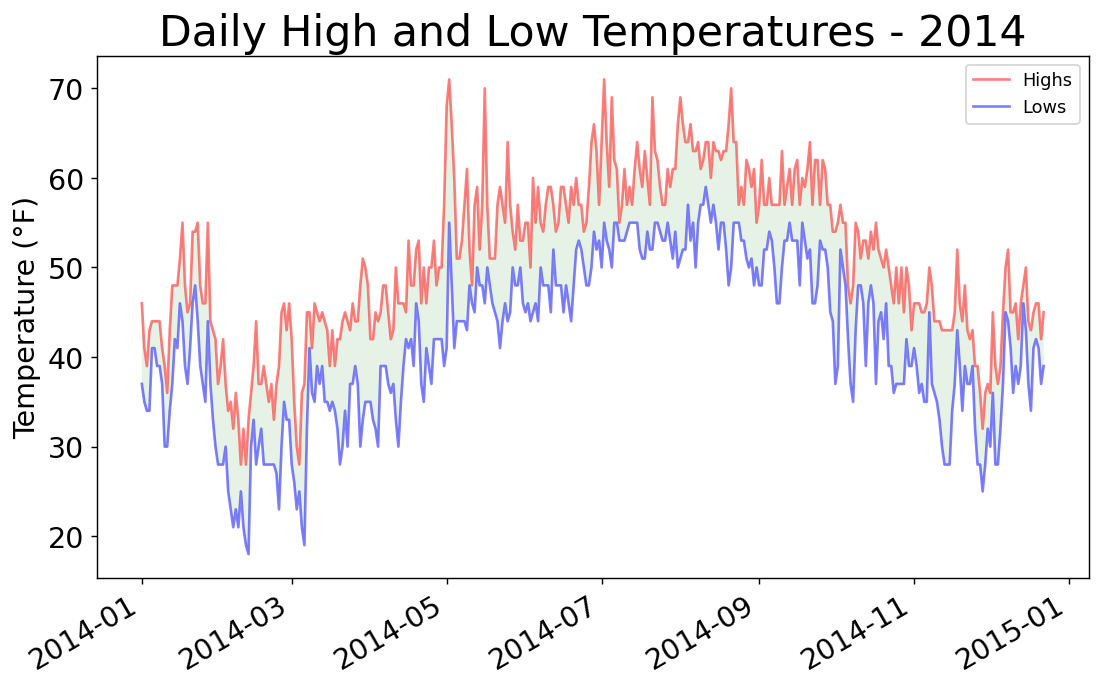

In [20]:
# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', label='Highs', alpha=0.5) 
plt.plot(dates, lows, c='blue', label='Lows', alpha=0.5)

# Shade the area between high and low temperatures.
plt.fill_between(dates, highs, lows, facecolor= 'green', alpha=0.1)

# Format plot.
plt.title("Daily High and Low Temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()  # Auto-format dates for readability
plt.ylabel("Temperature (°F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()  # Add a legend to distinguish highs and lows

# Show plot.
plt.show()


_The region between the two data sets is shaded_

## Error-Checking

We should be able to run the code from highs_lows.ipynb using data for any location. But some weather stations occasionally malfunction and fail to collect some or all of the data they’re supposed to. Missing data can result 
in exceptions that crash our programs if we don’t handle them properly.

For example, let’s see what happens when we attempt to generate a temperature plot for Death Valley, California

Missing or invalid data for row: ['2014-2-16', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0.00', '', '', '-1']


ValueError: x and y must have same first dimension, but have shapes (360,) and (359,)

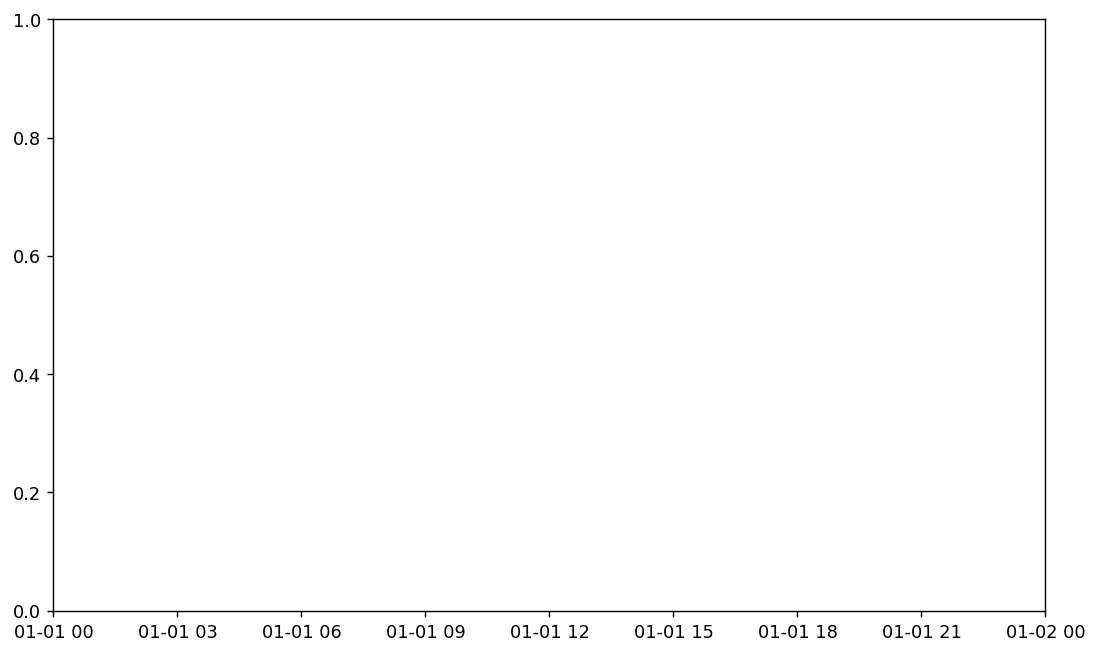

In [21]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Get dates and high temperatures from file.
filename = 'death_valley_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")  # Convert date string to datetime
            dates.append(current_date)
            
            high = int(row[1])  # Convert high temperature to integer
            highs.append(high)
        except ValueError:
            print(f"Missing or invalid data for row: {row}")

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# Format plot.
plt.title("Daily High Temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()  # Auto-format dates for readability
plt.ylabel("Temperature (°F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

# Show plot.
plt.show()

When we run the program we get an error. The traceback tells us that Python can’t process the high temperature 
for one of the dates because it can’t turn an empty string ('') into an integer. 

It seems that on February 16, 2014, no data was recorded; the string 
for the high temperature is empty. To address this issue, we’ll run errorchecking code when the values are being read from the CSV file to handle 
exceptions that might arise when we parse our data sets. Here’s how that 
works:

2014-02-16 00:00:00 missing data


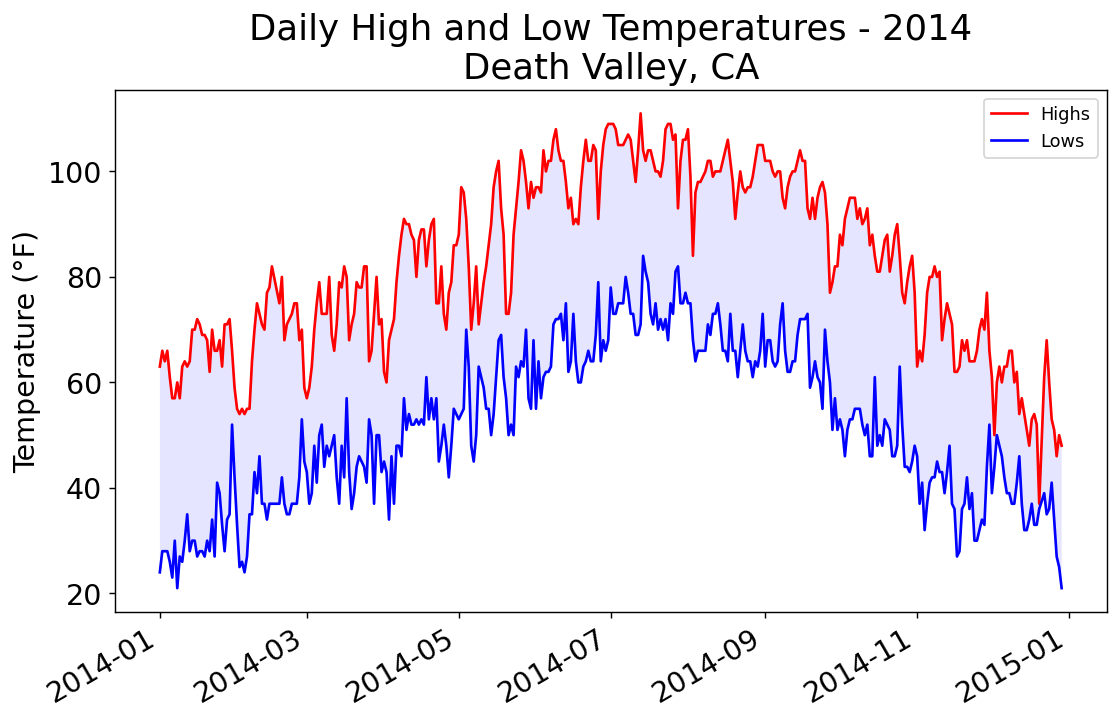

In [22]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Get dates, high, and low temperatures from file.
filename = 'death_valley_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader:
        try:
            # Try parsing the date and temperature values
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])  # High temperature
            low = int(row[3])   # Low temperature
        except ValueError:
            # Handle missing or invalid data
            print(current_date, 'missing data')
        else:
            # Append valid data to lists
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', label='Highs')
plt.plot(dates, lows, c='blue', label='Lows')
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures - 2014\nDeath Valley, CA"
plt.title(title, fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()  # Auto-format dates for readability
plt.ylabel("Temperature (°F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()

# Show plot.
plt.show()


_Daily high and low temperatures for Death Valley_

When you run highs_lows.py now, you’ll see that only one date had missing data.